## 1. Absolute Difference

In [ ]:
from PIL import Image # DDocj anhr
import numpy as np # Xử lý ma trận
import os # Thao tác lấy tên file, move file của OS
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path, # DDocj anh tu duong dan
    folder_to_images # doc het anh tu folder
)

In [ ]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant'] # xu ly ngoai le
query_path = "big_smile_high.jpg"
size = (224, 224)

In [ ]:
query = read_image_from_path(query_path, size)

In [ ]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

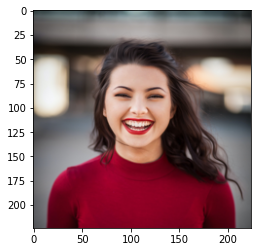

In [ ]:
plt.imshow(query/255.0);

In [ ]:
def absolute_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.sum(np.abs(X - query), axis=axis_batch_size)

In [ ]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path) # mang numpy nhieu anh, paths
        rates = absolute_difference(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
#Wall time: 3min 36s

Wall time: 2min 29s


In [ ]:
# ABSOLUTE DIFF
#10 - 1140: 18.9 s
#50 - 6551: 1min 13s
#100 - 13292: 2min 29s
#all - 17046: 3min 36s

In [ ]:
#10: 1140
#50: 6551
#100: 13292
#all: 17046

17046

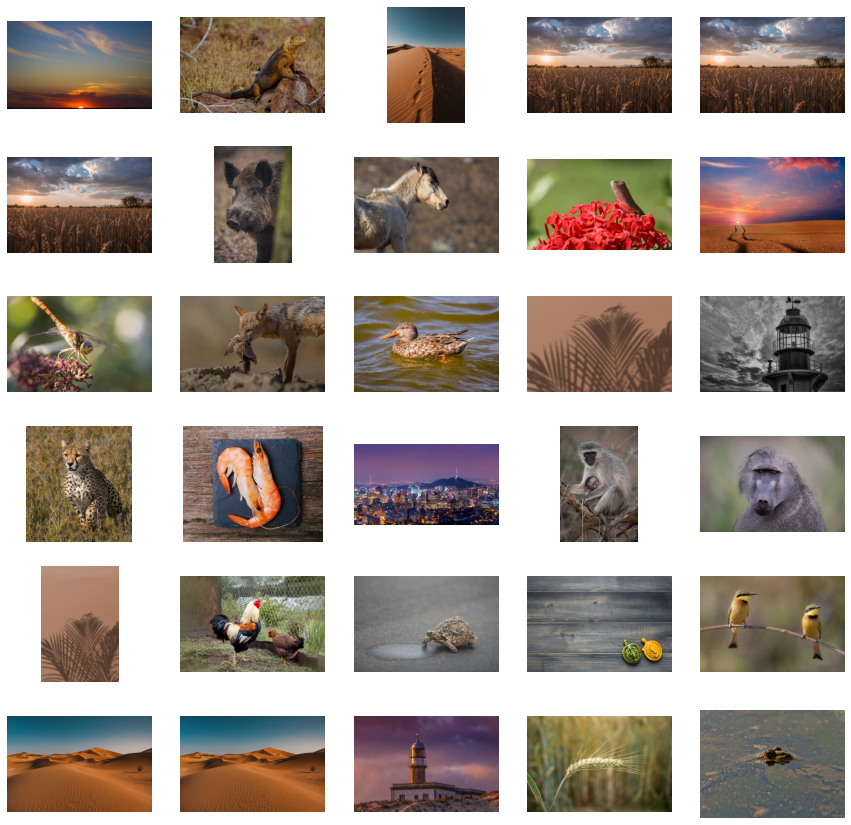

In [ ]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 2. Mean Square Difference

In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [ ]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [ ]:
query = read_image_from_path(query_path, size)

In [ ]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

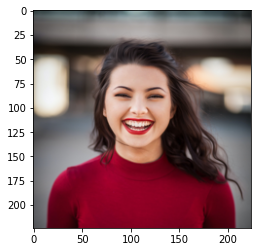

In [ ]:
plt.imshow(query/255.0);

In [ ]:
def mean_square_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.mean((X - query)**2, axis=axis_batch_size)

In [ ]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = mean_square_difference(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 2min 55s

Wall time: 2min 19s


In [ ]:
# Mean Square Difference
#10 - 1140: 11.4 s
#50 - 6551: 1min 4s
#100 - 13292: 2min 19s
#all - 17046: 2min 55s

In [ ]:
len(ls_path_score)

17044

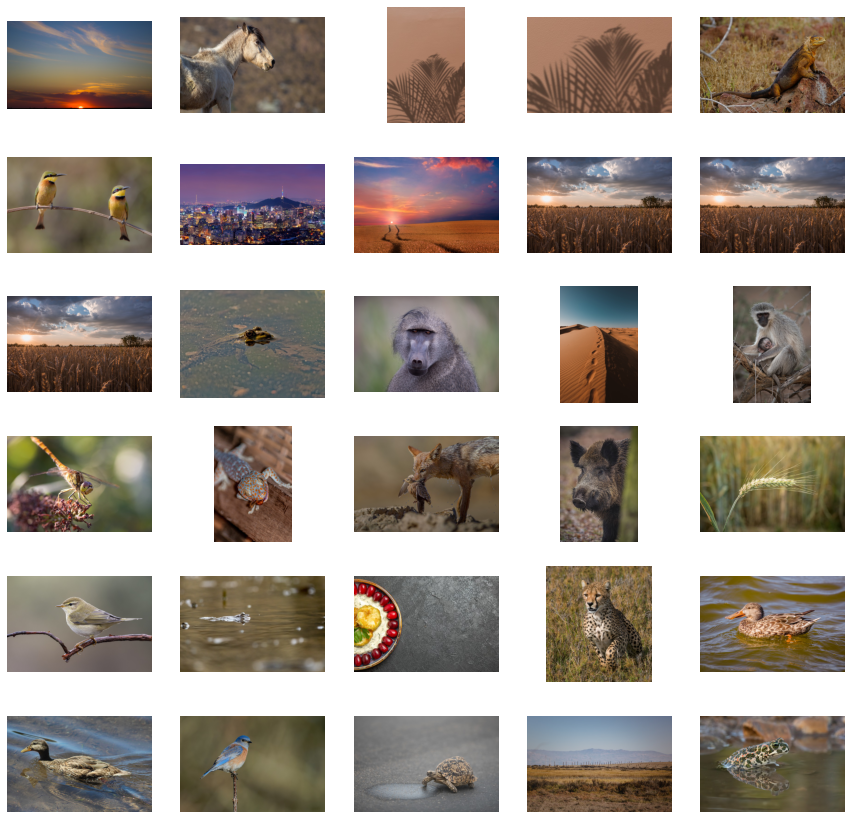

In [ ]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 3. Cosine Similarity

In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [ ]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [ ]:
query = read_image_from_path(query_path, size)

In [ ]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

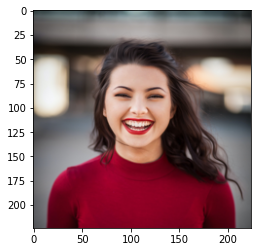

In [ ]:
plt.imshow(query/255.0);

In [ ]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [ ]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = cosine_similarity(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 3min

Wall time: 2min 24s


In [ ]:
# cosine_similarity
#10 - 1140: 12.4 s
#50 - 6551: 1min 7s
#100 - 13292: 2min 24s
#all - 17046: 3min

In [ ]:
len(ls_path_score)

17044

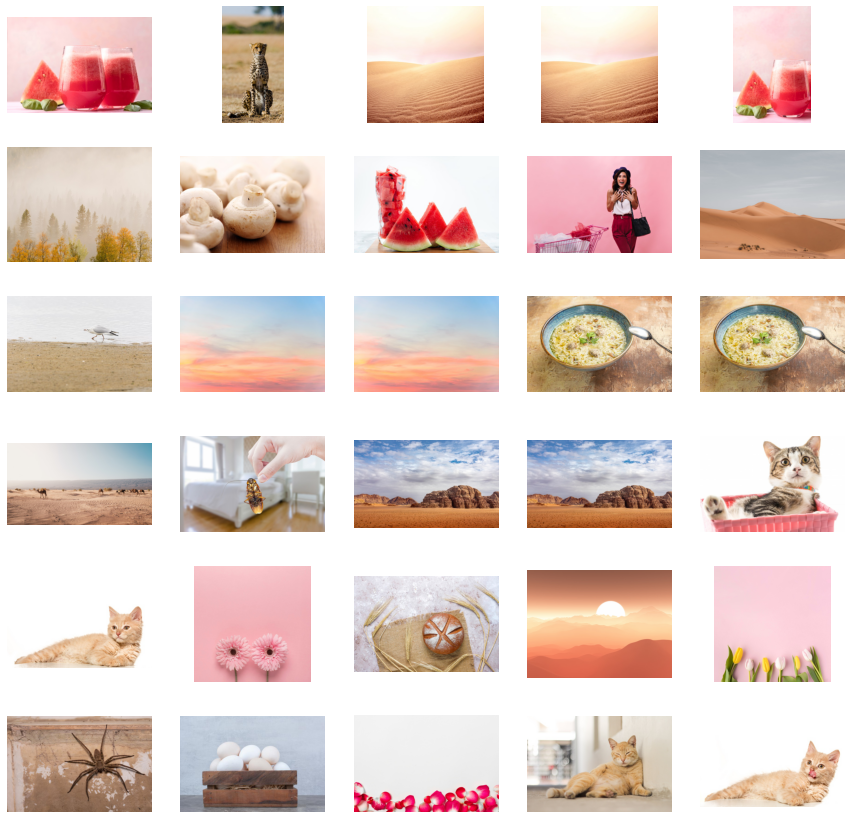

In [ ]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 4. Correlation Coefficient

In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [ ]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [ ]:
query = read_image_from_path(query_path, size)

In [ ]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

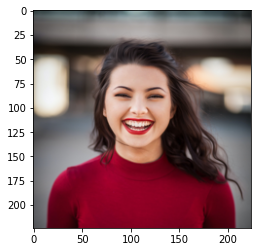

In [ ]:
plt.imshow(query/255.0);

![](https://cdn.educba.com/academy/wp-content/uploads/2019/06/Correlation-Coefficient-Formula.jpg)

In [ ]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    # Ứng dụng mean
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [ ]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = correlation_coefficient(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 3min 12s

Wall time: 2min 36s


In [ ]:
# correlation_coefficient
#10 - 1140: 12.9 s
#50 - 6551: 1min 17s
#100 - 13292: 2min 36s
#all - 17046: 3min 12s

In [ ]:
len(ls_path_score)

17044

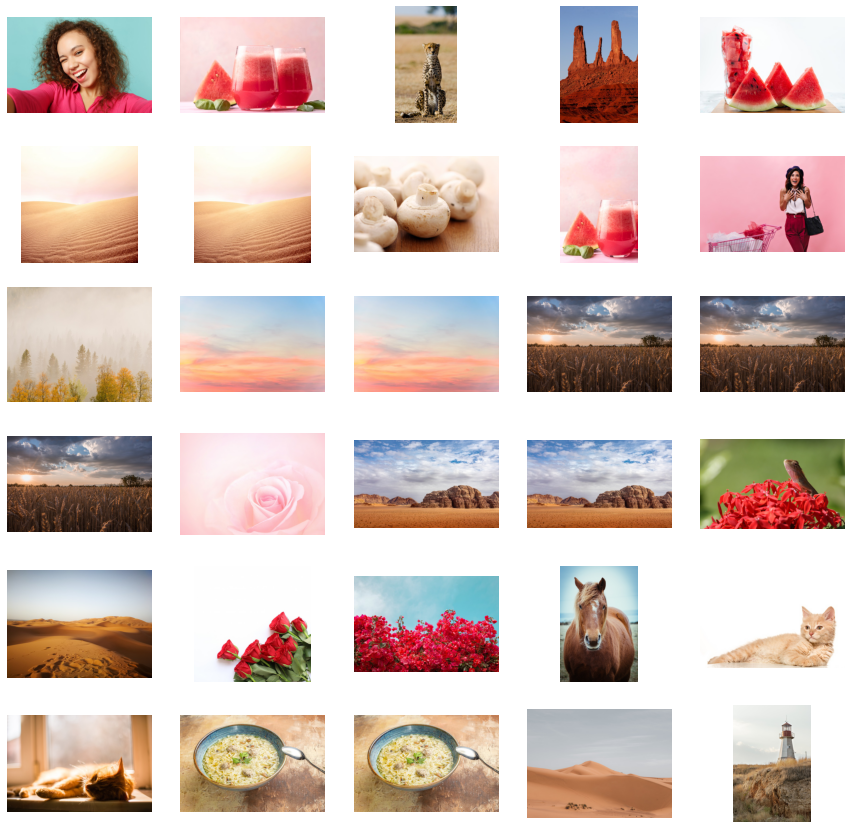

In [ ]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()